# Restaurant Food Cost Analysis

# Introduction

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel("Data_Train.xlsx")
df_test=pd.read_excel("Data_Test.xlsx")


In [3]:
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [5]:
# checking for null values
df_train.isnull().sum(),df_test.isnull().sum()

(TITLE               0
 RESTAURANT_ID       0
 CUISINES            0
 TIME                0
 CITY              112
 LOCALITY           98
 RATING              2
 VOTES            1204
 COST                0
 dtype: int64,
 TITLE              0
 RESTAURANT_ID      0
 CUISINES           0
 TIME               0
 CITY              35
 LOCALITY          30
 RATING             2
 VOTES            402
 dtype: int64)

In [6]:
# checking datatypes
df_train.dtypes,df_test.dtypes


(TITLE            object
 RESTAURANT_ID     int64
 CUISINES         object
 TIME             object
 CITY             object
 LOCALITY         object
 RATING           object
 VOTES            object
 COST              int64
 dtype: object,
 TITLE            object
 RESTAURANT_ID     int64
 CUISINES         object
 TIME             object
 CITY             object
 LOCALITY         object
 RATING           object
 VOTES            object
 dtype: object)

In [7]:
for col in df_train.columns:
    if df_train[col].dtype=="object":
        print(df_train[col].value_counts())
        print()

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
KIOSK,FOOD COURT               1
SWEET SHOP,BEVERAGE SHOP       1
QUICK BITES,FOOD TRUCK         1
LOUNGE,FINE DINING             1
BAR,CLUB                       1
Name: TITLE, Length: 113, dtype: int64

South Indian                                              532
North Indian                                              526
North Indian, Chinese                                     501
Fast Food                                                 286
Chinese                                                   167
                                                         ... 
Arabian, Beverages                                          1
Street Food, Mithai, North Indian, Beverages, Desserts      1
Beverages, Desserts, Sandwich                               1
European, Modern Indian, Asian         

In [8]:
for col in df_test.columns:
    if df_test[col].dtype=="object":
        print(df_test[col].value_counts())
        print()

QUICK BITES                   1416
CASUAL DINING                 1258
None                           284
CAFÉ                           223
DESSERT PARLOR                 126
                              ... 
PUB,LOUNGE                       1
BAR,PUB                          1
CLUB,FINE DINING                 1
COCKTAIL BAR,CASUAL DINING       1
FOOD TRUCK,DESSERT PARLOR        1
Name: TITLE, Length: 86, dtype: int64

North Indian, Chinese                                                          213
North Indian                                                                   190
South Indian                                                                   174
Fast Food                                                                       78
Chinese                                                                         59
                                                                              ... 
Salad, Continental, Healthy Food                                              

Data Cleaning for 'VOTES' Column

In [9]:
#lets chcek all the rows in train dataset where votes are null
df_train.loc[df_train["VOTES"].isnull()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
13,CASUAL DINING,4319,South Indian,11am – 11:30pm (Mon-Sun),Kochi,Edappally,-,NaN,400
62,QUICK BITES,7841,"North Indian, Beverages",11am – 11pm (Mon-Sun),Kochi,Kalamassery,NEW,NaN,200
69,None,11096,"Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Kalkaji,NEW,NaN,200
85,QUICK BITES,12657,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,-,NaN,300
111,CASUAL DINING,7095,"Gujarati, Rajasthani, North Indian","11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",Mumbai,Borivali West,NEW,NaN,800
...,...,...,...,...,...,...,...,...,...
12630,CASUAL DINING,9959,"Tex-Mex, Italian, Coffee",8am – 10:30pm (Mon-Sun),Gurgaon,Golf Course Road,NEW,NaN,1200
12641,CASUAL DINING,8312,Kerala,7:30am – 11:30pm (Mon-Sun),Kochi,Pallimukku,-,NaN,300
12646,QUICK BITES,6050,"Kerala, Chinese",11am – 11pm (Mon-Sun),Ernakulam,Market Road,-,NaN,300
12658,None,9384,"Kerala, South Indian",11am – 5pm (Mon-Sun),Kochi,Chittoor Road,NEW,NaN,400


In [10]:
#lets chcek all the rows in test dataset where votes are null
df_test.loc[df_test["VOTES"].isnull()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
6,CASUAL DINING,1643,"North Indian, Street Food, Fast Food","12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)",Navi Mumbai,Kharghar,NEW,NaN
21,CASUAL DINING,3852,"North Indian, South Indian",12noon – 11pm (Mon-Sun),Chennai,Anna Salai,NEW,NaN
24,QUICK BITES,8102,"Biryani, Andhra, North Indian",11am – 11pm (Mon-Sun),Bangalore,Banaswadi,NEW,NaN
27,CASUAL DINING,4696,"Continental, Italian","11am – 12midnight (Mon-Thu),11am – 1am (Fri-Sun)",Bangalore,BTM,NEW,NaN
29,QUICK BITES,14208,"North Indian, Chinese",12noon – 1am (Mon-Sun),Mumbai,Bandra West,NEW,NaN
...,...,...,...,...,...,...,...,...
4183,CAFÉ,7007,"Cafe, North Indian",11am – 11pm (Mon-Sun),Noida,Sector 63,NEW,NaN
4185,QUICK BITES,6387,Fast Food,12:30pm – 10:30pm (Mon-Sun),New Delhi,Shalimar Bagh,NEW,NaN
4198,QUICK BITES,13381,Continental,11am – 12midnight (Mon-Sun),Bangalore,Indiranagar,NEW,NaN
4223,CASUAL DINING,6887,"Sindhi, Street Food","11:30am – 4pm, 7pm – 11:30pm (Mon-Sun)",Mumbai,Lower Parel,NEW,NaN


Data Cleaning for VOTES COLUMN

In [11]:
#fisrt we need to strip of " votes" 
df_train["VOTES"]=df_train["VOTES"].str.strip("votes")
df_test["VOTES"]=df_test["VOTES"].str.strip("votes")

In [12]:
df_train["VOTES"].value_counts(),df_test["VOTES"].value_counts()

(44       71
 29       66
 28       66
 38       65
 35       64
          ..
 6086      1
 2825      1
 2982      1
 3863      1
 748       1
 Name: VOTES, Length: 1847, dtype: int64,
 6        30
 22       26
 58       26
 4        24
 23       24
          ..
 1011      1
 1005      1
 1742      1
 929       1
 829       1
 Name: VOTES, Length: 1136, dtype: int64)

In [13]:
#Imputing missing cells in votes column
df_train["VOTES"].fillna(0,inplace=True)
df_test["VOTES"].fillna(0,inplace=True)

In [14]:
# Converting votes column to int from object
df_train["VOTES"]=df_train["VOTES"].astype(int)
df_test["VOTES"]=df_test["VOTES"].astype(int)

In [15]:
#checking again null values
df_train["VOTES"].isnull().sum(),df_test["VOTES"].isnull().sum()

(0, 0)

Data Cleaning for 'RATING' Column

In [16]:
#chceking value counts for "RATING" in train dataset
df_train["RATING"].value_counts()


3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64

In [17]:
#chceking value counts for "RATING" for test dataset
df_test["RATING"].value_counts()


3.8    414
3.9    405
4.0    399
3.7    351
3.6    310
4.1    281
4.2    245
NEW    223
3.5    217
3.4    202
4.3    184
-      177
4.4    122
3.3    120
3.2     83
3.1     77
4.5     75
3.0     59
2.9     56
2.8     45
4.6     43
2.7     40
2.6     24
4.7     21
4.8     17
2.5     16
2.4      9
4.9      6
2.3      5
2.2      2
2.1      1
Name: RATING, dtype: int64

In [18]:
# replacing in training dataset
df_train["RATING"].replace("NEW",0,inplace=True)
df_train["RATING"].replace("-",0,inplace=True)
df_train["RATING"].fillna(0,inplace=True)

In [19]:
# replacing in test dataset
df_test["RATING"].replace("NEW",0,inplace=True)
df_test["RATING"].replace("-",0,inplace=True)
df_test["RATING"].fillna(0,inplace=True)

In [20]:
#Lets change the datatypes of"RATING" to float
df_train["RATING"]=df_train["RATING"].astype(float)
df_test["RATING"]=df_test["RATING"].astype(float)

In [21]:
#So rating column has been imputed
df_train["RATING"].isnull().sum(),df_test["RATING"].isnull().sum()

(0, 0)

Data Cleaning for 'CITY' Column and 'LOCALITY' Column Together

In [22]:
#lets chcek where city is null in train dataset
df_train.loc[df_train["CITY"].isnull()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
129,None,9101,"North Indian, South Indian, Chinese, Continental","12noon – 3pm, 7pm – 2am (Mon-Sun)",NaN,NaN,3.6,728,500
246,QUICK BITES,14502,Biryani,12noon – 11pm (Mon-Sun),NaN,Palarivattom Kochi,3.4,82,300
411,None,6313,"North Indian, Chinese, Pizza, Burger, Fast Food",7pm – 4am (Mon-Sun),NaN,NaN,4.0,29,600
466,None,1133,North Indian,4pm – 9pm (Mon-Sun),NaN,NaN,4.2,55,200
481,None,4788,Street Food,"11am – 11pm (Mon),9:30am – 12midnight (Tue-Sun)",NaN,NaN,3.7,616,250
...,...,...,...,...,...,...,...,...,...
12280,None,3446,"North Indian, Chinese",5pm – 5am (Mon-Sun),NaN,NaN,3.7,281,500
12314,CASUAL DINING,11724,"North Indian, Bengali","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",NaN,Opposite to corporation bank and LIC office ba...,4.3,775,650
12447,QUICK BITES,7314,"North Indian, Chinese, Mughlai, Seafood",12:30pm – 12midnight (Mon-Sun),NaN,Hyderabad,3.1,44,350
12567,None,15532,"Biryani, Chinese, Fast Food, North Indian","11am – 1am (Mon, Sun), 11am – 12:15AM (Tue-Sat)",NaN,NaN,3.7,656,300


In [23]:
#lets chcek where city is null in test dataset
df_test.loc[df_test["CITY"].isnull()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
164,None,10640,"North Indian, Chinese, Momos, Beverages","7am – 4am (Mon, Tue, Fri, Sat, Sun), 8am – 4am...",NaN,NaN,3.5,321
169,QUICK BITES,10663,"North Indian, Chinese",11am – 11pm (Mon-Sun),NaN,Chennai,3.5,161
205,None,9605,South Indian,11am – 3am (Mon-Sun),NaN,NaN,3.5,37
225,None,15291,"North Indian, Chinese, Continental",11:30am – 11:30pm (Mon-Sun),NaN,NaN,4.5,50
308,None,13834,"North Indian, Biryani, Kebab","6pm – 12midnight (Mon, Tue, Wed, Thu, Fri, Sun...",NaN,NaN,0.0,0
341,None,7993,"Fast Food, Mexican","12noon – 3pm, 7pm – 12midnight (Mon-Sun)",NaN,NaN,4.6,115
493,None,14472,"North Indian, Chinese, Continental","12midnight – 4am, 7pm – 12midnight (Mon-Sun)",NaN,NaN,4.5,177
693,None,14033,"Beverages, Desserts, Fast Food",11am – 11pm (Mon-Sun),NaN,NaN,3.5,13
710,QUICK BITES,451,"Arabian, North Indian, Chinese","12noon – 3pm, 5:30pm – 11pm (Mon-Sun)",NaN,Chennai,3.4,69
844,QUICK BITES,12667,"Andhra, Hyderabadi, North Indian","11am – 3:30pm, 7pm – 10:30pm (Mon-Sun)",NaN,NaN,3.3,430


In [24]:
#imputing both "LOCALITY" and "CITY" columns with "missing" when ever both are nan in train dataset
import math
null_city_indexes=df_train.loc[df_train["CITY"].isnull()].index
for index in null_city_indexes :
    try:
        if math.isnan(df_train["CITY"].iloc[index]) and math.isnan(df_train["LOCALITY"].iloc[index]):
            df_train["CITY"].iloc[index]="missing"
            df_train["LOCALITY"].iloc[index]="missing"
    except:
        pass

In [25]:
#imputing both "LOCALITY" and "CITY" columns with "missing" when ever both are nan for test dataset

null_city_indexes=df_test.loc[df_test["CITY"].isnull()].index
for index in null_city_indexes :
    try:
        if math.isnan(df_test["CITY"].iloc[index]) and math.isnan(df_test["LOCALITY"].iloc[index]):
            df_test["CITY"].iloc[index]="missing"
            df_test["LOCALITY"].iloc[index]="missing"
    except:
        pass

In [26]:
#lets again chcek the null values
df_train['CITY'].isnull().sum(),df_train['LOCALITY'].isnull().sum(),df_test['CITY'].isnull().sum(),df_test['LOCALITY'].isnull().sum()

(15, 1, 5, 0)

In [27]:
#lets chcek where city is null in train dataset
df_train.loc[df_train["CITY"].isnull()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
246,QUICK BITES,14502,Biryani,12noon – 11pm (Mon-Sun),NaN,Palarivattom Kochi,3.4,82,300
817,CASUAL DINING,1042,"Thai, Chinese, Continental, North Indian, Italian",12noon – 12midnight (Mon-Sun),NaN,shop 7 shikrupa socity,4.1,486,1200
5149,"BEVERAGE SHOP,DESSERT PARLOR",7264,"Beverages, Ice Cream, Desserts",11am – 11pm (Mon-Sun),NaN,Navi Mumbai,3.8,163,400
5297,CASUAL DINING,1030,Continental,24 Hours (Mon-Sun),NaN,Kochi,3.4,19,1000
6397,CAFÉ,7334,"Cafe, American, Asian, Bakery, Biryani, Chines...",9am – 9:30pm (Mon-Sun),NaN,Alibaug,4.2,253,950
6451,BAKERY,2595,Bakery,10am – 10pm (Mon-Sun),NaN,Chennai,3.5,10,400
8456,QUICK BITES,12367,"Fast Food, Beverages",9:30am – 11pm (Mon-Sun),NaN,Mathikere,3.7,28,150
8735,CASUAL DINING,15526,"Chinese, Burger",11am – 11pm (Mon-Sun),NaN,Chennai,3.8,284,400
9121,"PUB,CASUAL DINING",9800,"Finger Food, American, Continental, Burger, Pizza",11am – 1am (Mon-Sun),NaN,Bangalore,3.9,557,1500
9268,QUICK BITES,12021,Lebanese,11am – 11pm (Mon-Sun),NaN,Kochi,3.4,14,200


In [28]:
#lets chcek where city is null in test dataset
df_test.loc[df_test["CITY"].isnull()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
169,QUICK BITES,10663,"North Indian, Chinese",11am – 11pm (Mon-Sun),NaN,Chennai,3.5,161
710,QUICK BITES,451,"Arabian, North Indian, Chinese","12noon – 3pm, 5:30pm – 11pm (Mon-Sun)",NaN,Chennai,3.4,69
1354,QUICK BITES,14152,"North Indian, Chinese, Mughlai","11:30am – 4pm, 5pm – 11pm (Mon-Sun)",NaN,Jaipuria Sunrise Plaza,3.9,362
3621,"PUB,CASUAL DINING",9779,"Continental, Mexican, American",5pm – 1:30am (Mon-Sun),NaN,Maharashtra 400013,4.0,1142
4167,QUICK BITES,12015,Lebanese,4pm – 11pm (Mon-Sun),NaN,Chennai,3.7,124


In [29]:
# Imputing on training Dataset

#lets collect city names after removing dupliactes
city_list=df_train["CITY"].drop_duplicates().to_list()
null_city_indexes=df_train.loc[df_train["CITY"].isnull()].index
for index in null_city_indexes:
    for city in city_list:
        if city in df_train["LOCALITY"].iloc[index].split():
            df_train["CITY"].iloc[index]=city


In [30]:
# Checking Again null values in city
df_train.loc[df_train["CITY"].isnull()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
817,CASUAL DINING,1042,"Thai, Chinese, Continental, North Indian, Italian",12noon – 12midnight (Mon-Sun),NaN,shop 7 shikrupa socity,4.1,486,1200
6397,CAFÉ,7334,"Cafe, American, Asian, Bakery, Biryani, Chines...",9am – 9:30pm (Mon-Sun),NaN,Alibaug,4.2,253,950
8456,QUICK BITES,12367,"Fast Food, Beverages",9:30am – 11pm (Mon-Sun),NaN,Mathikere,3.7,28,150
12314,CASUAL DINING,11724,"North Indian, Bengali","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",NaN,Opposite to corporation bank and LIC office ba...,4.3,775,650


In [31]:
# fillling nan values in city and locality colmn in train dataset
df_train["CITY"].fillna("missing",inplace=True)
df_train["LOCALITY"].fillna("missing",inplace=True)

In [32]:
# Imputing on test Dataset

#lets collect city names after removing dupliactes
city_list=df_test["CITY"].drop_duplicates().to_list()
null_city_indexes=df_test.loc[df_test["CITY"].isnull()].index
for index in null_city_indexes:
    for city in city_list:
        if city in df_test["LOCALITY"].iloc[index].split():
            df_test["CITY"].iloc[index]=city


In [33]:
# Checking Again null values in city
df_test.loc[df_test["CITY"].isnull()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
1354,QUICK BITES,14152,"North Indian, Chinese, Mughlai","11:30am – 4pm, 5pm – 11pm (Mon-Sun)",NaN,Jaipuria Sunrise Plaza,3.9,362


In [34]:
# fillling nan values in city and locality colmn in test dataset
df_test["CITY"].fillna("missing",inplace=True)

In [35]:
# Checking Again Datasets after imputations in all column for null values
df_train.isnull().sum(),df_test.isnull().sum()

(TITLE            0
 RESTAURANT_ID    0
 CUISINES         0
 TIME             0
 CITY             0
 LOCALITY         0
 RATING           0
 VOTES            0
 COST             0
 dtype: int64,
 TITLE            0
 RESTAURANT_ID    0
 CUISINES         0
 TIME             0
 CITY             0
 LOCALITY         0
 RATING           0
 VOTES            0
 dtype: int64)

In [36]:
# again checking data types
df_train.dtypes,df_test.dtypes

(TITLE             object
 RESTAURANT_ID      int64
 CUISINES          object
 TIME              object
 CITY              object
 LOCALITY          object
 RATING           float64
 VOTES              int32
 COST               int64
 dtype: object,
 TITLE             object
 RESTAURANT_ID      int64
 CUISINES          object
 TIME              object
 CITY              object
 LOCALITY          object
 RATING           float64
 VOTES              int32
 dtype: object)

In [37]:
# lets check the data again in train dataset
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32,400


In [38]:
#Lets check the data again in test dataset
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,0.0,0


In [39]:
#Lets drop "RESTAURANT_ID" and "TIME" from the dataset
df_train.drop(columns=["RESTAURANT_ID","TIME"],inplace=True)
df_test.drop(columns=["RESTAURANT_ID","TIME"],inplace=True)

Data Cleaning for 'CUISINES' Columns

In [40]:
#Now we will divide the CUISINES column into multiple columns in training dataset
#First we will find maximum number of cuisines resutarnt are serving in training dataset
max_cuisines=-1
for i in range(len(df_train["CUISINES"])):
    temp=len(df_train["CUISINES"].iloc[i].split(","))
    if temp>max_cuisines:
        max_cuisines=temp
print("Max number of cuisines serverd in training dataset are :{}".format(max_cuisines))

Max number of cuisines serverd in training dataset are :8


In [41]:
c1=list()
c2=list()
c3=list()
c4=list()
c5=list()
c6=list()
c7=list()
c8=list()
for i in range(len(df_train["CUISINES"])):
    temp=df_train["CUISINES"].iloc[i].split(",")
    try :
        c1.append(temp[0].strip().upper())
    except :
        c1.append('NONE')
    try :
        c2.append(temp[1].strip().upper())
    except :
        c2.append('NONE')
    try :
        c3.append(temp[2].strip().upper())
    except :
        c3.append('NONE')
    try :
        c4.append(temp[3].strip().upper())
    except :
        c4.append('NONE')
    try :
        c5.append(temp[4].strip().upper())
    except :
        c5.append('NONE')
    try :
        c6.append(temp[5].strip().upper())
    except :
        c6.append('NONE')
    try :
        c7.append(temp[6].strip().upper())
    except :
        c7.append('NONE')
    try :
        c8.append(temp[7].strip().upper())
    except :
        c8.append('NONE')

In [42]:
df_train["c1"]=c1
df_train["c2"]=c2
df_train["c3"]=c3
df_train["c4"]=c4
df_train["c5"]=c5
df_train["c6"]=c6
df_train["c7"]=c7
df_train["c8"]=c8

In [43]:
#Now we will divide the CUISINES column into multiple columns in test dataset
#First we will find maximum number of cuisines resutarnt are serving in test dataset
max_cuisines=-1
for i in range(len(df_test["CUISINES"])):
    temp=len(df_test["CUISINES"].iloc[i].split(","))
    if temp>max_cuisines:
        max_cuisines=temp
print("Max number of cuisines serverd in test dataset are :{}".format(max_cuisines))

Max number of cuisines serverd in test dataset are :8


In [44]:
c1=list()
c2=list()
c3=list()
c4=list()
c5=list()
c6=list()
c7=list()
c8=list()
for i in range(len(df_test["CUISINES"])):
    temp=df_test["CUISINES"].iloc[i].split(",")
    try :
        c1.append(temp[0].strip().upper())
    except :
        c1.append('NONE')
    try :
        c2.append(temp[1].strip().upper())
    except :
        c2.append('NONE')
    try :
        c3.append(temp[2].strip().upper())
    except :
        c3.append('NONE')
    try :
        c4.append(temp[3].strip().upper())
    except :
        c4.append('NONE')
    try :
        c5.append(temp[4].strip().upper())
    except :
        c5.append('NONE')
    try :
        c6.append(temp[5].strip().upper())
    except :
        c6.append('NONE')
    try :
        c7.append(temp[6].strip().upper())
    except :
        c7.append('NONE')
    try :
        c8.append(temp[7].strip().upper())
    except :
        c8.append('NONE')

In [45]:
df_test["c1"]=c1
df_test["c2"]=c2
df_test["c3"]=c3
df_test["c4"]=c4
df_test["c5"]=c5
df_test["c6"]=c6
df_test["c7"]=c7
df_test["c8"]=c8

Data Cleaning for 'TITLE' Column

In [46]:
#Now we will divide the "TITLE" column into multiple columns
#First we will find maximum number of TITLE resutarnt having in training dataset
max_titles=-1
for i in range(len(df_train["TITLE"])):
    temp=len(df_train["TITLE"].iloc[i].split(","))
    if temp>max_titles:
        max_titles=temp
print("Max number of titles are :{}".format(max_titles))

Max number of titles are :2


In [47]:
t1=list()
t2=list()
for i in range(len(df_train["TITLE"])):
    temp=df_train["TITLE"].iloc[i].split(",")
    try :
        t1.append(temp[0].strip().upper())
    except :
        t1.append('NONE')
    try :
        t2.append(temp[1].strip().upper())
    except :
        t2.append('NONE')
        
df_train["t1"]=t1
df_train["t2"]=t2

In [48]:
#Now we will divide the "TITLE" column into multiple columns
#First we will find maximum number of TITLE resutarnt having in test dataset
max_titles=-1
for i in range(len(df_test["TITLE"])):
    temp=len(df_test["TITLE"].iloc[i].split(","))
    if temp>max_titles:
        max_titles=temp
print("Max number of titles are :{}".format(max_titles))

Max number of titles are :2


In [49]:
t1=list()
t2=list()
for i in range(len(df_test["TITLE"])):
    temp=df_test["TITLE"].iloc[i].split(",")
    try :
        t1.append(temp[0].strip().upper())
    except :
        t1.append('NONE')
    try :
        t2.append(temp[1].strip().upper())
    except :
        t2.append('NONE')
        
df_test["t1"]=t1
df_test["t2"]=t2

In [50]:
df_train

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,c1,c2,c3,c4,c5,c6,c7,c8,t1,t2
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49,1200,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30,1500,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,BAR
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221,800,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24,800,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,QUICK BITES,NONE
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165,300,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,DESSERT PARLOR,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab",Hyderabad,Gachibowli,3.8,546,500,NORTH INDIAN,BURGER,KEBAB,NONE,NONE,NONE,NONE,NONE,QUICK BITES,NONE
12686,"CASUAL DINING,BAR","Goan, Continental",Mumbai,Bandra Kurla Complex,4.3,1214,1800,GOAN,CONTINENTAL,NONE,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,BAR
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",Navi Mumbai,Vashi,4.0,608,1300,FINGER FOOD,CONTINENTAL,ASIAN,CHINESE,NONE,NONE,NONE,NONE,LOUNGE,NONE
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",Chennai,Maduravoyal,3.5,32,400,NORTH INDIAN,SOUTH INDIAN,CHINESE,STREET FOOD,NONE,NONE,NONE,NONE,CASUAL DINING,NONE


In [51]:
df_test

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,c1,c2,c3,c4,c5,c6,c7,c8,t1,t2
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",Noida,Sector 18,4.3,564,NORTH INDIAN,CHINESE,MUGHLAI,KEBAB,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",Mumbai,Grant Road,4.2,61,SOUTH INDIAN,FAST FOOD,PIZZA,NORTH INDIAN,NONE,NONE,NONE,NONE,QUICK BITES,NONE
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",Mumbai,Marine Lines,3.8,350,NORTH INDIAN,SEAFOOD,BIRYANI,CHINESE,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
3,None,Biryani,Faridabad,NIT,3.8,1445,BIRYANI,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,QUICK BITES,"South Indian, Kerala",Kochi,Kaloor,3.6,23,SOUTH INDIAN,KERALA,NONE,NONE,NONE,NONE,NONE,NONE,QUICK BITES,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",New Delhi,Punjabi Bagh,3.9,287,NORTH INDIAN,MUGHLAI,CHINESE,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
4227,None,"Biryani, North Indian, Sandwich, Salad, Wraps",Bangalore,HSR Layout,4.3,469,BIRYANI,NORTH INDIAN,SANDWICH,SALAD,WRAPS,NONE,NONE,NONE,NONE,NONE
4228,QUICK BITES,"Continental, North Indian",Faridabad,Sector 86,3.7,53,CONTINENTAL,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,NONE,QUICK BITES,NONE
4229,QUICK BITES,"Rolls, Beverages",Kochi,Kochi,0.0,0,ROLLS,BEVERAGES,NONE,NONE,NONE,NONE,NONE,NONE,QUICK BITES,NONE


In [52]:
#We can drop "CUISINE" and "TITLE"columns
df_train.drop(columns=["CUISINES","TITLE"],inplace=True)
df_test.drop(columns=["CUISINES","TITLE"],inplace=True)

# Data Vizualization

We will do Data Vizualization on training dataset only

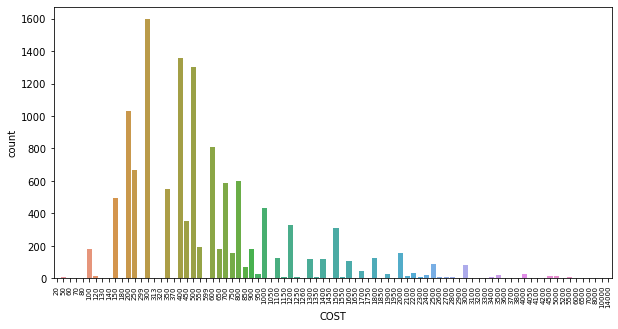

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='COST',data=df_train)
plt.xticks(fontsize = 7,rotation=90)
plt.show()

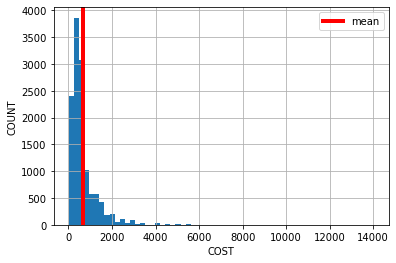

Mean Cost is:  655.2522458628841


In [54]:
# checking mean for cost
cost=df_train['COST'].hist(bins=60)
mean=np.mean(df_train['COST'])
plt.axvline(mean,linewidth=4,color='red',label='mean')
plt.xlabel('COST')
plt.ylabel('COUNT')
plt.legend()
plt.show()
print('Mean Cost is: ',df_train['COST'].mean())

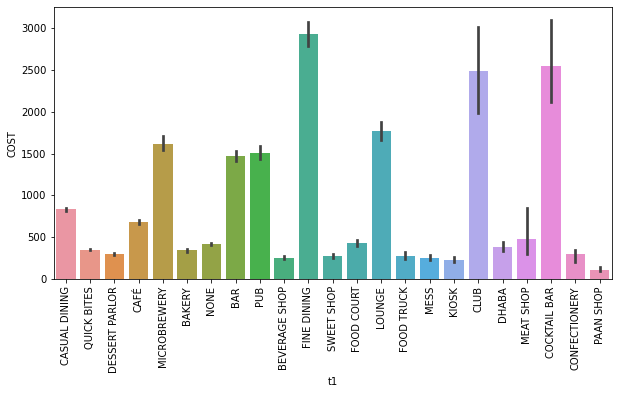

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(x="t1",y="COST",data=df_train)
plt.xticks(fontsize = 10,rotation=90)
plt.show()

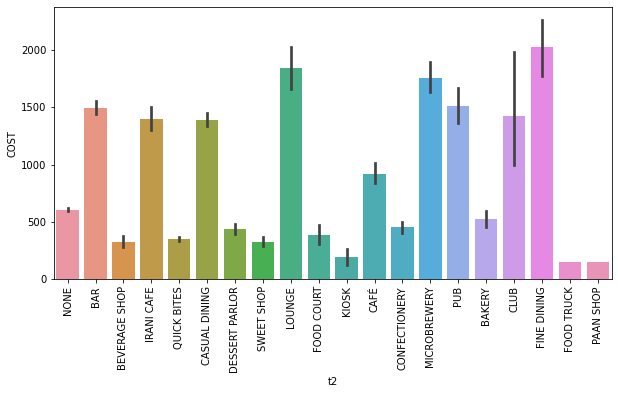

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(x="t2",y="COST",data=df_train)
plt.xticks(fontsize = 10,rotation=90)
plt.show()


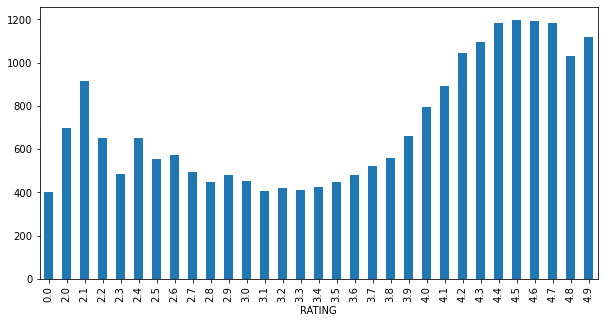

RATING
0.0     401.071429
2.0     700.000000
2.1     916.666667
2.2     650.000000
2.3     485.000000
2.4     653.333333
2.5     554.285714
2.6     572.131148
2.7     494.494382
2.8     446.506849
2.9     478.817204
3.0     450.588235
3.1     405.483871
3.2     419.169173
3.3     411.816438
3.4     423.513043
3.5     449.909209
3.6     481.093586
3.7     523.139963
3.8     558.007563
3.9     662.399031
4.0     794.822566
4.1     890.117521
4.2    1043.983402
4.3    1096.780576
4.4    1183.066298
4.5    1197.738693
4.6    1193.617021
4.7    1184.782609
4.8    1032.812500
4.9    1120.454545
Name: COST, dtype: float64


In [57]:
plt.figure(figsize=(10,5))
df_train.groupby(['RATING'])['COST'].mean().plot(kind='bar')
plt.show()
print(df_train.groupby(['RATING'])['COST'].mean())

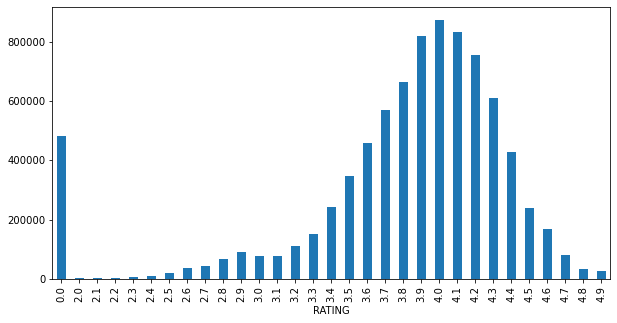

RATING
0.0    482890
2.0      1400
2.1      2750
2.2      1300
2.3      4850
2.4      9800
2.5     19400
2.6     34900
2.7     44010
2.8     65190
2.9     89060
3.0     76600
3.1     75420
3.2    111499
3.3    150313
3.4    243520
3.5    346880
3.6    457520
3.7    568130
3.8    664029
3.9    820050
4.0    873510
4.1    833150
4.2    754800
4.3    609810
4.4    428270
4.5    238350
4.6    168300
4.7     81750
4.8     33050
4.9     24650
Name: COST, dtype: int64


In [58]:
plt.figure(figsize=(10,5))
df_train.groupby(['RATING'])['COST'].sum().plot(kind='bar')
plt.show()
print(df_train.groupby(['RATING'])['COST'].sum())

# EDA on Training Dataset

In [59]:
from sklearn.preprocessing import LabelEncoder
for col in df_train.columns:
    if df_train[col].dtype=="object":
        df_train[col]=LabelEncoder().fit_transform(df_train[col])

In [60]:
df_train

,CITY,LOCALITY,RATING,VOTES,COST,c1,c2,c3,c4,c5,c6,c7,c8,t1,t2
0,320,285,3.6,49,1200,59,32,67,61,58,47,32,15,4,15
1,67,1046,4.2,30,1500,6,60,41,61,58,47,32,15,4,1
2,67,1101,3.8,221,800,72,23,12,32,58,47,32,15,4,15
3,222,136,4.1,24,800,100,23,65,61,58,47,32,15,21,15
4,222,620,3.8,165,300,28,65,65,61,58,47,32,15,8,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,131,342,3.8,546,500,72,17,44,61,58,47,32,15,21,15
12686,222,133,4.3,1214,1800,37,25,65,61,58,47,32,15,4,1
12687,239,1342,4.0,608,1300,34,25,4,18,58,47,32,15,14,15
12688,67,631,3.5,32,400,72,85,21,77,58,47,32,15,4,15


In [61]:
df_train.corr()

,CITY,LOCALITY,RATING,VOTES,COST,c1,c2,c3,c4,c5,c6,c7,c8,t1,t2
CITY,1.000000,0.071694,-0.057226,0.035753,0.039254,0.012131,0.010874,0.005948,0.006114,-0.000305,0.000816,-0.010638,-0.003137,-0.007006,-0.014488
LOCALITY,0.071694,1.000000,-0.021238,-0.032876,-0.018318,0.018015,0.017934,0.011044,0.007513,0.004508,0.007064,0.012274,0.021872,0.039433,0.015841
RATING,-0.057226,-0.021238,1.000000,0.258331,0.232358,-0.022644,-0.056121,-0.082657,-0.086450,-0.059368,-0.051464,-0.028399,-0.028659,-0.116958,-0.107120
VOTES,0.035753,-0.032876,0.258331,1.000000,0.257231,-0.039848,-0.047772,-0.103423,-0.093148,-0.075431,-0.040731,-0.048602,-0.063398,-0.144602,-0.164234
COST,0.039254,-0.018318,0.232358,0.257231,1.000000,-0.038191,-0.033522,-0.116204,-0.120662,-0.074205,-0.046935,-0.045254,-0.044427,-0.299395,-0.266802
c1,0.012131,0.018015,-0.022644,-0.039848,-0.038191,1.000000,0.020315,-0.043067,0.018384,0.015363,0.014450,0.033081,0.033301,0.210665,0.089625
c2,0.010874,0.017934,-0.056121,-0.047772,-0.033522,0.020315,1.000000,0.043000,0.025296,0.030011,0.037299,0.024666,0.035614,0.105205,0.116475
c3,0.005948,0.011044,-0.082657,-0.103423,-0.116204,-0.043067,0.043000,1.000000,0.168226,0.093936,0.039565,0.047656,0.057324,0.133077,0.099753
c4,0.006114,0.007513,-0.086450,-0.093148,-0.120662,0.018384,0.025296,0.168226,1.000000,0.228134,0.138023,0.099054,0.100333,0.112314,0.114524
c5,-0.000305,0.004508,-0.059368,-0.075431,-0.074205,0.015363,0.030011,0.093936,0.228134,1.000000,0.272393,0.209396,0.155810,0.086511,0.085410


Here we can see the correlation between the columns. For better understanding lets vizualize it through heatmap correlation

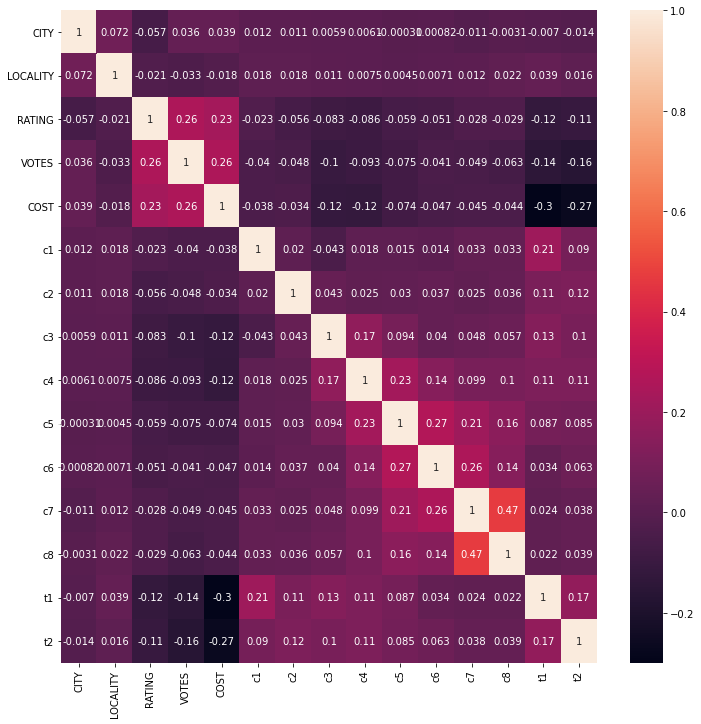

In [62]:
# heatmap
import seaborn as sns
corr_hmap=df_train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Lets plot graph for correlation now

Text(0.5, 1.0, 'Correlation with Target Variable')

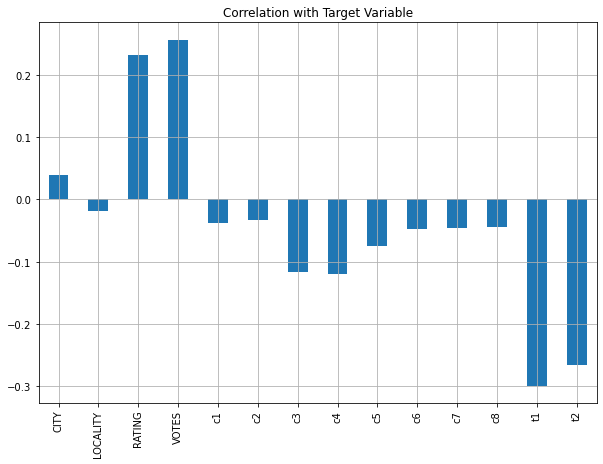

In [63]:
plt.figure(figsize=(10,7))
df_train.drop('COST',axis=1).corrwith(df_train['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title('Correlation with Target Variable')

CITY           AxesSubplot(0.125,0.657941;0.133621x0.222059)
LOCALITY    AxesSubplot(0.285345,0.657941;0.133621x0.222059)
RATING       AxesSubplot(0.44569,0.657941;0.133621x0.222059)
VOTES       AxesSubplot(0.606034,0.657941;0.133621x0.222059)
COST        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
c1             AxesSubplot(0.125,0.391471;0.133621x0.222059)
c2          AxesSubplot(0.285345,0.391471;0.133621x0.222059)
c3           AxesSubplot(0.44569,0.391471;0.133621x0.222059)
c4          AxesSubplot(0.606034,0.391471;0.133621x0.222059)
c5          AxesSubplot(0.766379,0.391471;0.133621x0.222059)
c6                AxesSubplot(0.125,0.125;0.133621x0.222059)
c7             AxesSubplot(0.285345,0.125;0.133621x0.222059)
c8              AxesSubplot(0.44569,0.125;0.133621x0.222059)
t1             AxesSubplot(0.606034,0.125;0.133621x0.222059)
t2             AxesSubplot(0.766379,0.125;0.133621x0.222059)
dtype: object

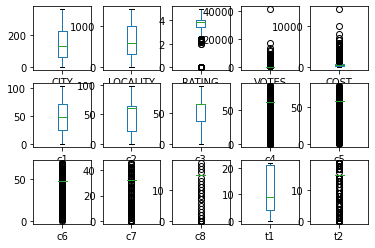

In [64]:
# Checking for Outliers
df_train.plot.box(subplots=True,layout=(3,5))

We do not remove outliers because it cause loss of data more than 10% which is not good for analysis.

In [65]:
#splitting the data for training and test

df_x=df_train.drop(columns=['COST'])
y=df_train['COST']

In [66]:
# Checking the skewness
df_x.skew()

CITY         0.293953
LOCALITY     0.333505
RATING      -2.214271
VOTES       14.522617
c1           0.022450
c2          -0.102601
c3          -0.957442
c4          -2.302018
c5          -4.379358
c6          -7.347635
c7         -10.796655
c8         -14.020045
t1           0.087325
t2          -3.057865
dtype: float64

In [67]:
# Treating the skewness
df_x.skew()
for col in df_x.skew().index:
    if col in df_x.describe().columns:
        if df_x[col].skew()>0.55:
            df_x[col]=np.sqrt(df_x[col])
        if df_x[col].skew()<-0.55:
            df_x[col]=np.cbrt(df_x[col])

In [68]:
# Checking the skewness again
df_x.skew()

CITY         0.293953
LOCALITY     0.333505
RATING      -2.689034
VOTES        1.992414
c1           0.022450
c2          -0.102601
c3          -1.548855
c4          -3.028584
c5          -5.234599
c6          -9.903620
c7         -14.250419
c8         -14.926766
t1           0.087325
t2          -3.880072
dtype: float64

In [69]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

# Sending Data to Models

In [71]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [72]:
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    if r2_scr>max_score:
        max_score=r2_scr
        final_r_state=r_state
print("Maximimum r2 Score is",max_score,'at',final_r_state)

Maximimum r2 Score is 0.25365251238084185 at 67


In [73]:
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print("Score of ",m," is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Error:")
    print("Mean Absolute Error:",mean_absolute_error(y_test,predm))
    print("Mean Squared Error:",mean_squared_error(y_test,predm))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 Score:",r2_score(y_test,predm))
    print("**************************************************************************************************")
    print('\n')

Score of  LinearRegression()  is 0.21025391101276392
Error:
Mean Absolute Error: 306.4274465966933
Mean Squared Error: 281905.98301551474
Root Mean Squared Error: 530.9481924025307
R2 Score: 0.20850527030487165
**************************************************************************************************


Score of  Lasso()  is 0.2102273216933822
Error:
Mean Absolute Error: 306.40487312436466
Mean Squared Error: 281930.90461821697
Root Mean Squared Error: 530.9716608428523
R2 Score: 0.20843529904359037
**************************************************************************************************


Score of  Ridge()  is 0.21025390962224644
Error:
Mean Absolute Error: 306.4270056812278
Mean Squared Error: 281904.6817268453
Root Mean Squared Error: 530.9469669626575
R2 Score: 0.20850892387445075
**************************************************************************************************


Score of  ElasticNet()  is 0.1953704121165638
Error:
Mean Absolute Error: 312.107996846

# Using some ensemble techniques to boost accuracy

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
model=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print("Score of ",m," is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Error:")
    print("Mean Absolute Error:",mean_absolute_error(y_test,predm))
    print("Mean Squared Error:",mean_squared_error(y_test,predm))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 Score:",r2_score(y_test,predm))
    print("**************************************************************************************************")
    print('\n')

Score of  RandomForestRegressor()  is 0.9570971007606891
Error:
Mean Absolute Error: 196.25119537965617
Mean Squared Error: 116625.77165410477
Root Mean Squared Error: 341.5051561164264
R2 Score: 0.6725550744846334
**************************************************************************************************


Score of  AdaBoostRegressor()  is -0.5512842790557719
Error:
Mean Absolute Error: 658.3235124367828
Mean Squared Error: 646088.7392533881
Root Mean Squared Error: 803.7964538696275
R2 Score: -0.8139942493036161
**************************************************************************************************


Score of  GradientBoostingRegressor()  is 0.716382286888799
Error:
Mean Absolute Error: 198.75466505710227
Mean Squared Error: 105210.48193076847
Root Mean Squared Error: 324.36165299056
R2 Score: 0.7046052692244393
**************************************************************************************************




# Using GridsearchCV

In [77]:
from sklearn.model_selection import GridSearchCV
gbr=GradientBoostingRegressor()
estimator={'n_estimators':[50,100,150,200,300]}
clf=GridSearchCV(gbr,estimator)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 300}

# Best Model

In [82]:
# random forest has more better result than knr model
gbr=GradientBoostingRegressor(n_estimators=300)
gbr.fit(x_train,y_train)
print("Score is ",gbr.score(x_train,y_train))
predgbr=gbr.predict(x_test)
print('\n')
print("Mean Absolute Error:",mean_absolute_error(y_test,predgbr))
print("Mean Squared Error:",mean_squared_error(y_test,predgbr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predgbr)))
print("R2 Score:",r2_score(y_test,predgbr))

Score is  0.7754873286436366


Mean Absolute Error: 188.72492914802757
Mean Squared Error: 97017.90413856288
Root Mean Squared Error: 311.47697208391327
R2 Score: 0.7276072008464127


# Cross Valiation

In [83]:
from sklearn.model_selection import cross_val_score

gbrscores=cross_val_score(gbr,x,y,cv=5)
print(gbrscores)
print(gbrscores.mean(),gbrscores.std())

[0.65056664 0.73923145 0.73432147 0.72710355 0.75761885]
0.7217683927693208 0.03700255800856976


# Plot between Test and Predicted Data

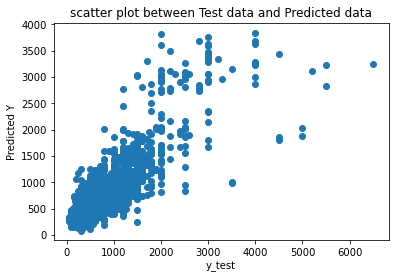

In [84]:
# Scatter plot between Test and Predicted Data
plt.scatter(y_test,predgbr)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title("scatter plot between Test data and Predicted data")
plt.show()

# Saving the Model

In [85]:
import joblib
joblib.dump(gbr,'Food.obj')


['Food.obj']

# EDA on Test Dataset

In [86]:
from sklearn.preprocessing import LabelEncoder
for col in df_test.columns:
    if df_test[col].dtype=="object":
        df_test[col]=LabelEncoder().fit_transform(df_test[col])

In [87]:
df_test.corr()

,CITY,LOCALITY,RATING,VOTES,c1,c2,c3,c4,c5,c6,c7,c8,t1,t2
CITY,1.000000,0.056077,-0.079524,0.019757,0.006891,0.016671,0.057527,0.012233,0.009431,0.009722,-0.018647,-0.006164,-0.006229,-0.013482
LOCALITY,0.056077,1.000000,-0.029872,-0.031237,0.027261,0.005758,0.016604,0.015271,0.014255,0.001325,0.001945,-0.015644,0.048066,0.024608
RATING,-0.079524,-0.029872,1.000000,0.270133,-0.013513,-0.056119,-0.075511,-0.088692,-0.053110,-0.029826,-0.035366,-0.030174,-0.105645,-0.081604
VOTES,0.019757,-0.031237,0.270133,1.000000,-0.038387,-0.054493,-0.084109,-0.087852,-0.083411,-0.053802,-0.028179,-0.016731,-0.140888,-0.146534
c1,0.006891,0.027261,-0.013513,-0.038387,1.000000,0.015611,-0.044559,0.015178,-0.000666,0.023352,0.019316,0.028226,0.219131,0.101326
c2,0.016671,0.005758,-0.056119,-0.054493,0.015611,1.000000,0.053438,0.054742,0.023644,0.030832,0.000567,0.018845,0.115229,0.128134
c3,0.057527,0.016604,-0.075511,-0.084109,-0.044559,0.053438,1.000000,0.148787,0.105705,0.080224,0.081882,0.082690,0.128282,0.116355
c4,0.012233,0.015271,-0.088692,-0.087852,0.015178,0.054742,0.148787,1.000000,0.225955,0.119469,0.090723,0.083230,0.116777,0.105040
c5,0.009431,0.014255,-0.053110,-0.083411,-0.000666,0.023644,0.105705,0.225955,1.000000,0.242054,0.175936,0.226612,0.094648,0.057591
c6,0.009722,0.001325,-0.029826,-0.053802,0.023352,0.030832,0.080224,0.119469,0.242054,1.000000,0.423782,0.243241,0.058444,0.022471


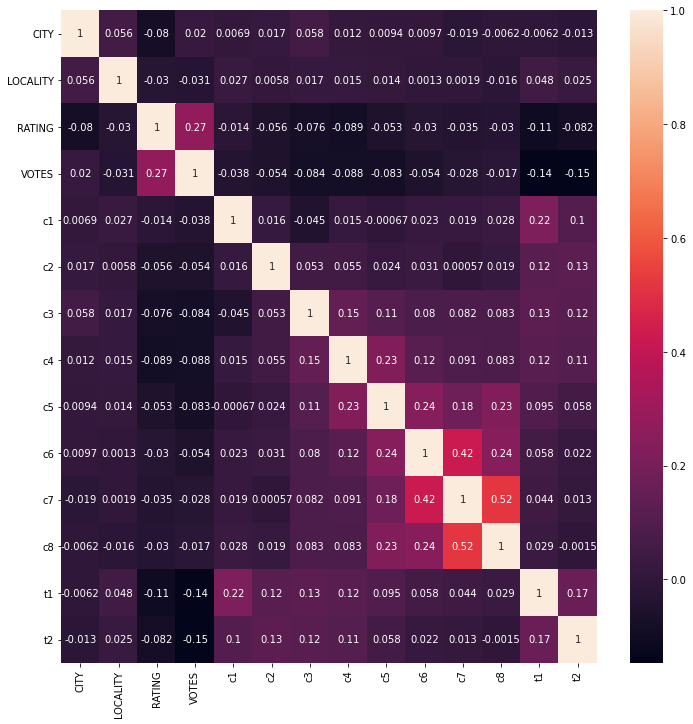

In [88]:
# heatmap
import seaborn as sns
corr_hmap=df_test.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_hmap,annot=True)
plt.show()

CITY           AxesSubplot(0.125,0.657941;0.133621x0.222059)
LOCALITY    AxesSubplot(0.285345,0.657941;0.133621x0.222059)
RATING       AxesSubplot(0.44569,0.657941;0.133621x0.222059)
VOTES       AxesSubplot(0.606034,0.657941;0.133621x0.222059)
c1          AxesSubplot(0.766379,0.657941;0.133621x0.222059)
c2             AxesSubplot(0.125,0.391471;0.133621x0.222059)
c3          AxesSubplot(0.285345,0.391471;0.133621x0.222059)
c4           AxesSubplot(0.44569,0.391471;0.133621x0.222059)
c5          AxesSubplot(0.606034,0.391471;0.133621x0.222059)
c6          AxesSubplot(0.766379,0.391471;0.133621x0.222059)
c7                AxesSubplot(0.125,0.125;0.133621x0.222059)
c8             AxesSubplot(0.285345,0.125;0.133621x0.222059)
t1              AxesSubplot(0.44569,0.125;0.133621x0.222059)
t2             AxesSubplot(0.606034,0.125;0.133621x0.222059)
dtype: object

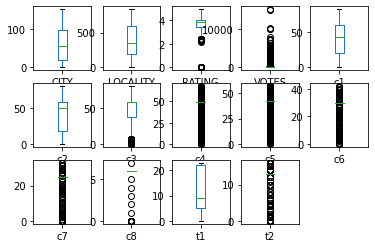

In [89]:
# Checking for Outliers
df_test.plot.box(subplots=True,layout=(3,5))

We do not remove outliers because it cause loss of data more than 10% which is not good for analysis.

In [90]:
df_test.skew()

CITY         0.111645
LOCALITY     0.302174
RATING      -2.190158
VOTES        7.049220
c1          -0.052133
c2          -0.141321
c3          -1.068772
c4          -2.299476
c5          -4.369849
c6          -7.060963
c7          -9.476542
c8         -12.258814
t1           0.078593
t2          -3.239490
dtype: float64

In [91]:
# Treating the skewness
df_test.skew()
for col in df_test.skew().index:
    if col in df_test.describe().columns:
        if df_test[col].skew()>0.55:
            df_test[col]=np.sqrt(df_test[col])
        if df_test[col].skew()<-0.55:
            df_test[col]=np.cbrt(df_test[col])

In [92]:
df_test.skew()

CITY         0.111645
LOCALITY     0.302174
RATING      -2.682567
VOTES        1.942047
c1          -0.052133
c2          -0.141321
c3          -1.614267
c4          -3.049317
c5          -5.295799
c6          -9.535016
c7         -11.856169
c8         -12.685994
t1           0.078593
t2          -4.228828
dtype: float64

# Predicting Target Variable

In [93]:
df_test['COST']=gbr.predict(df_test)

In [94]:
df_test['COST']

0       1922.722447
1       1922.722447
2       1922.722447
3       1922.722447
4       1895.199792
           ...     
4226    1922.722447
4227    1922.722447
4228    1922.722447
4229    1710.288096
4230    1922.722447
Name: COST, Length: 4231, dtype: float64

In [95]:
df_test['COST'].value_counts()

1922.722447    3047
1710.288096     367
1993.941194      99
1895.199792      96
1471.653886      93
               ... 
2199.704699       1
1736.460707       1
1905.454476       1
2171.120052       1
2469.729608       1
Name: COST, Length: 76, dtype: int64

In [96]:
print('Minimum Food Cost is:',df_test['COST'].min())
print('Minimum Food Cost is:',df_test['COST'].max())

Minimum Food Cost is: 819.1193734043409
Minimum Food Cost is: 2683.7937319756065
